# Logistic Regression - Multi-Layer Case
## (for mnist, cifar10 dataset)

# Library

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist, cifar10
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# Load data and data check

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

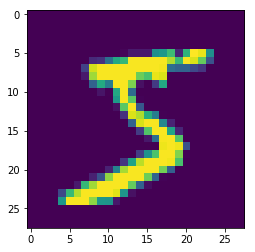

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [3]:
# data check
plt.figure()
plt.imshow(x_train[0])
plt.show()
print(x_train)
print(y_train)

# Data preprocessing (x reshape, x nomalize, y onehot)

In [4]:
shape = x_train.shape[1:]

# x data reshape
reshaped_x_train = x_train.reshape(-1, np.prod(shape))
reshaped_x_test = x_test.reshape(-1, np.prod(shape))

# x data normalization
X_train = reshaped_x_train / 255.
X_test = reshaped_x_test / 255.

# y data one hot encoding
Y_train = np.eye(10)[y_train.reshape(-1)]
Y_test = np.eye(10)[y_test.reshape(-1)]

In [5]:
print('X data shape:', X_train.shape, X_test.shape)
print('Y data shape:', Y_train.shape, Y_test.shape)
print()

print('X train data')
print(X_train)
print('X test data')
print(X_test)
print()

print('Y train data')
print(Y_train)
print('Y test data')
print(Y_test)

X data shape: (60000, 784) (10000, 784)
Y data shape: (60000, 10) (10000, 10)

X train data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X test data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y train data
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Y test data
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Multi Layer Logistic Regression

## Hyper parameter setting

In [6]:
# hypter parameter setting
learning_rate = 1e-1
training_epochs = 25
display_step = 5

# number of hidden layer's node
h = 256
# activation function
act = tf.nn.tanh

## Skeleton code

In [7]:
tf.reset_default_graph()

# place holder



# variables





# model




# cross entropy loss and optimizer

 

## Make model with get_variable

In [8]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
tf_Y = tf.placeholder(tf.float32, [None, 10])

# get variables
w1 = tf.get_variable('w1', [np.prod(shape), h])
b1 = tf.get_variable('b1', [h])
w2 = tf.get_variable('w2', [h, 10])
b2 = tf.get_variable('b2', [10])

# model
hidden1 = act(tf_X @ w1 + b1)
pred = tf.nn.softmax(hidden1 @ w2 + b2)


# cross entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(tf_Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

## Make model with tf.layers.dense

In [9]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
tf_Y = tf.placeholder(tf.float32, [None, 10])

# get variables





# model
hidden1 = tf.layers.dense(tf_X, h, activation=act)
logit = tf.layers.dense(hidden1, 10)
pred = tf.nn.softmax(logit)

# cross entropy loss
loss = tf.losses.softmax_cross_entropy(tf_Y, logit)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Train and result (without batch)

In [10]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    losses = []  # init loss list
    for epoch in range(training_epochs):
        # get loss in sess.run
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_Y:Y_train})
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    #tf.argmax(pred, 1)는 'pred' 값에서 '1'차원에서 높은 값을 리턴///equal 같은 자리에같은값만 True, 나머지 false
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))#cast 데이터 타입 바꿈 , 그러면 여기는 True가 1로 나머지 0
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 5 	Loss: 1.7367046
Epoch: 10 	Loss: 1.2996505
Epoch: 15 	Loss: 1.0567713
Epoch: 20 	Loss: 0.90834373
Epoch: 25 	Loss: 0.8096034
최적화 완료
정확도: 0.8351


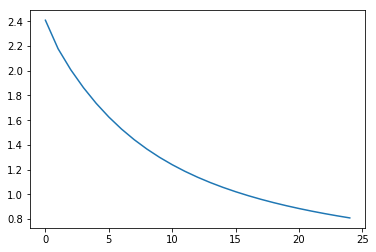

array([[ 933,    0,   26,    5,    4,   35,   22,    4,   13,   15],
       [   0, 1079,   34,    3,    9,   35,    9,   47,   18,   13],
       [   9,    3,  812,   28,    4,   13,   36,   26,   18,    6],
       [   5,    5,   36,  859,    0,  112,    3,    0,   64,   11],
       [   0,    1,   11,    3,  839,   31,   16,   13,   18,   93],
       [   5,    3,    1,   25,    0,  552,   14,    0,   16,   10],
       [  19,    6,   31,    7,   19,   35,  846,    2,   20,    5],
       [   1,    1,   21,   20,    4,   15,    0,  883,   13,   44],
       [   8,   37,   43,   48,   14,   42,   12,   13,  747,   11],
       [   0,    0,   17,   12,   89,   22,    0,   40,   47,  801]])

In [11]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)

# Train and result (with batch - 1)

In [12]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    batch_size = 100  ### batch size hyper_parameter
    losses = []  # init loss list
    for epoch in range(training_epochs):
        # get loss in sess.run
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_Y:Y_train})
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 5 	Loss: 1.7496979
Epoch: 10 	Loss: 1.3058469
Epoch: 15 	Loss: 1.0599719
Epoch: 20 	Loss: 0.91041434
Epoch: 25 	Loss: 0.8111794
최적화 완료
정확도: 0.83


# Train and result (with batch - 2)

In [13]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    batch_size = 100  # batch size hyper_parameter
    total_batch = int( len(X_train)/batch_size )  ### total batch: number of batches
    losses = [sess.run(loss, feed_dict={tf_X: X_train, tf_Y: Y_train})]  # init loss list
    for epoch in range(training_epochs):
        # get loss in sess.run
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_Y:Y_train})
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 5 	Loss: 1.6914661
Epoch: 10 	Loss: 1.2653401
Epoch: 15 	Loss: 1.0337569
Epoch: 20 	Loss: 0.89332086
Epoch: 25 	Loss: 0.7997529
최적화 완료
정확도: 0.8352


# Train and result (with batch - 3) - DO NOT EXECUTE

In [14]:
# # train
# init = tf.global_variables_initializer()

# with tf.Session() as sess:
#     # init
#     sess.run(init)
    
#     # train
#     batch_size = 100  # batch size hyper_parameter
#     total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
#     losses = []  # init loss list
#     for epoch in range(0, training_epochs):
#         for i in range(total_batch):
#             # get loss in sess.run
#             _, l = sess.run([optimizer, loss], feed_dict={tf_X: X_train, tf_Y: Y_train}) 
#         losses.append(l)  # save loss

#         if (epoch + 1) % display_step == 0:
#             print("Epoch:", epoch + 1, "\tLoss:", l) 


#     print("최적화 완료") 

#     # result
#     correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     test_accuracy, y_test_pred = sess.run([accuracy, pred], 
#                                           feed_dict={tf_X: X_test, tf_Y: Y_test})
#     print("정확도:", test_accuracy) 

# Train and result (with batch - 4)

In [15]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    batch_size = 100  # batch size hyper_parameter
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = []  # init loss list
    for epoch in range(0, training_epochs):
        for i in range(total_batch):
            ### get batch
            x_batch = X_train[i*batch_size:(i+1)*batch_size]
            y_batch = Y_train[i*batch_size:(i+1)*batch_size]

            # get loss in sess.run ### batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 5 	Loss: 0.22184063
Epoch: 10 	Loss: 0.17599215
Epoch: 15 	Loss: 0.15326641
Epoch: 20 	Loss: 0.13662165
Epoch: 25 	Loss: 0.122879125
최적화 완료
정확도: 0.9748


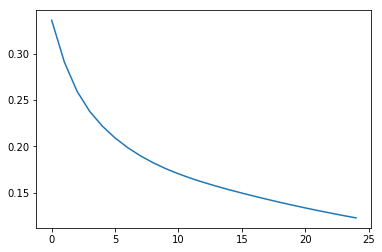

array([[ 970,    0,    6,    0,    2,    2,    7,    1,    4,    4],
       [   0, 1125,    1,    1,    0,    1,    2,    6,    1,    2],
       [   1,    3, 1007,    4,    3,    0,    1,   11,    4,    0],
       [   0,    2,    3,  989,    1,    9,    0,    4,    9,    7],
       [   1,    0,    3,    0,  956,    1,    2,    3,    6,   10],
       [   3,    1,    0,    7,    0,  870,   10,    1,    5,    5],
       [   1,    2,    2,    0,    3,    6,  933,    0,    3,    0],
       [   1,    1,    5,    2,    2,    1,    2,  989,    4,    4],
       [   2,    1,    5,    2,    1,    1,    1,    2,  932,    0],
       [   1,    0,    0,    5,   14,    1,    0,   11,    6,  977]])

In [16]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)

# Train and result (with batch - 5)

In [17]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    batch_size = 100  # batch size hyper_parameter
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = []  # init loss list
    for epoch in range(0, training_epochs):
        ### shuffle
        idx = np.random.permutation(len(X_train))
        shuffled_X_train = X_train[idx]
        shuffled_Y_train = Y_train[idx]
        
        for i in range(total_batch):
            # get batch
            x_batch = shuffled_X_train[i*batch_size:(i+1)*batch_size]
            y_batch = shuffled_Y_train[i*batch_size:(i+1)*batch_size]

            # get loss in sess.run # batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 5 	Loss: 0.18088688
Epoch: 10 	Loss: 0.040997032
Epoch: 15 	Loss: 0.09472225
Epoch: 20 	Loss: 0.054913424
Epoch: 25 	Loss: 0.019206036
최적화 완료
정확도: 0.9778


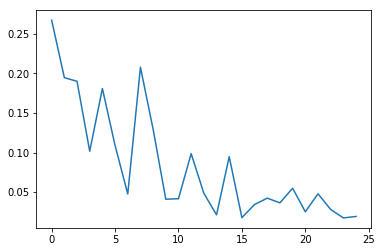

array([[ 968,    0,    6,    0,    1,    5,    6,    1,    4,    5],
       [   0, 1124,    1,    0,    0,    1,    3,    4,    1,    2],
       [   1,    2, 1008,    1,    2,    0,    1,    8,    3,    0],
       [   0,    1,    2,  995,    1,    7,    1,    1,    4,    7],
       [   1,    0,    2,    0,  959,    0,    4,    0,    3,    6],
       [   2,    1,    0,    3,    0,  866,    4,    0,    4,    3],
       [   3,    3,    2,    0,    4,    6,  936,    0,    3,    0],
       [   3,    1,    6,    6,    3,    1,    1, 1007,    4,   12],
       [   2,    3,    5,    3,    1,    5,    2,    3,  946,    5],
       [   0,    0,    0,    2,   11,    1,    0,    4,    2,  969]])

In [18]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)

# Train and result (with batch - iteration losses)

In [19]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    batch_size = 100  # batch size hyper_parameter
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = []  # init loss list
    iteration_losses = [] ### init iteration losses
    for epoch in range(0, training_epochs):
        # shuffle
        idx = np.random.permutation(len(X_train))
        shuffled_X_train = X_train[idx]
        shuffled_Y_train = Y_train[idx]
        
        for i in range(total_batch):
            # get batch
            x_batch = shuffled_X_train[i*batch_size:(i+1)*batch_size]
            y_batch = shuffled_Y_train[i*batch_size:(i+1)*batch_size]
            
            # get loss in sess.run # batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
            iteration_losses.append(l)  ### save iteration loss
        losses.append(l)  # save loss

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 5 	Loss: 0.22111984
Epoch: 10 	Loss: 0.17257956
Epoch: 15 	Loss: 0.039491583
Epoch: 20 	Loss: 0.06097535
Epoch: 25 	Loss: 0.03366465
최적화 완료
정확도: 0.9763


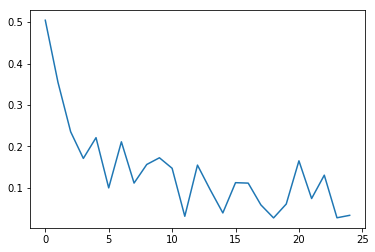

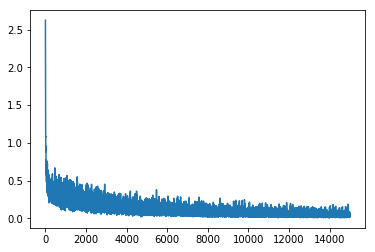

array([[ 969,    0,    5,    1,    1,    4,    6,    1,    3,    4],
       [   0, 1124,    1,    0,    0,    1,    3,    2,    1,    2],
       [   1,    2, 1004,    2,    3,    0,    0,    9,    3,    0],
       [   1,    1,    2,  987,    1,    7,    1,    2,    4,    4],
       [   1,    0,    2,    0,  946,    0,    4,    1,    4,    6],
       [   4,    1,    0,    4,    1,  868,    4,    0,    3,    2],
       [   0,    3,    3,    0,    4,    5,  934,    0,    2,    1],
       [   1,    1,    5,    5,    4,    1,    0, 1001,    4,    8],
       [   2,    3,   10,    7,    2,    3,    6,    2,  948,    0],
       [   1,    0,    0,    4,   20,    3,    0,   10,    2,  982]])

In [20]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)

# Train and result (with batch - epoch losses)

In [21]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    batch_size = 100  # batch size hyper_parameter
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = []  # init loss list
    iteration_losses = [] # init iteration losses
    for epoch in range(0, training_epochs):
        ### avg loss
        avg_loss = 0.
        
        # shuffle
        idx = np.random.permutation(len(X_train))
        shuffled_X_train = X_train[idx]
        shuffled_Y_train = Y_train[idx]
        
        for i in range(total_batch):
            # get batch
            x_batch = shuffled_X_train[i*batch_size:(i+1)*batch_size]
            y_batch = shuffled_Y_train[i*batch_size:(i+1)*batch_size]
            
            # get loss in sess.run # batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
            iteration_losses.append(l)  ### save iteration loss
            avg_loss = avg_loss + l ### avg_loss += l
        avg_loss = avg_loss / total_batch  ### avg_loss: average loss of iterations in an epoch
        losses.append(avg_loss)  ### save average loss (epoch loss)

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 5 	Loss: 0.2817798
Epoch: 10 	Loss: 0.034410123
Epoch: 15 	Loss: 0.110754624
Epoch: 20 	Loss: 0.054130804
Epoch: 25 	Loss: 0.06569463
최적화 완료
정확도: 0.9776


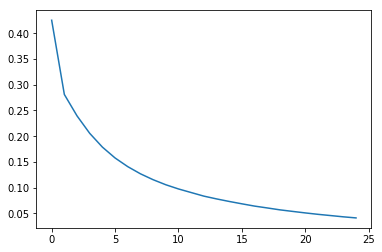

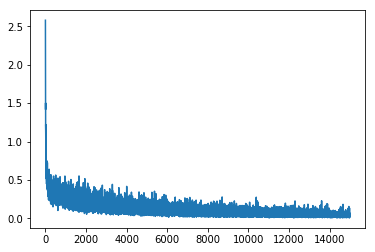

array([[ 968,    0,    6,    0,    1,    3,    7,    1,    3,    2],
       [   0, 1123,    0,    0,    0,    1,    3,    5,    0,    3],
       [   1,    2, 1007,    2,    3,    0,    2,    7,    3,    1],
       [   1,    2,    1,  995,    1,    9,    1,    4,    6,    5],
       [   1,    0,    2,    0,  961,    2,    3,    1,    3,   10],
       [   3,    1,    0,    2,    0,  865,    2,    0,    4,    3],
       [   2,    3,    1,    0,    3,    5,  935,    0,    3,    1],
       [   2,    1,    6,    3,    2,    1,    1, 1000,    4,    5],
       [   1,    3,    9,    4,    1,    4,    4,    2,  946,    3],
       [   1,    0,    0,    4,   10,    2,    0,    8,    2,  976]])

In [22]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)

# Sum-up

In [23]:
#################### hyper parameter setting ####################
learning_rate = 1e-2
training_epochs = 100
display_step = 10

### batch_size
batch_size = 100

# number of hidden layer's node
h = 256
# activation function
act = tf.nn.tanh
#################################################################

# build model
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, np.prod(shape)])
tf_Y = tf.placeholder(tf.float32, [None, 10])

# model
hidden1 = tf.layers.dense(tf_X, h, activation=act)
logit = tf.layers.dense(hidden1, 10)
pred = tf.nn.softmax(logit)

# cross entropy loss
loss = tf.losses.softmax_cross_entropy(tf_Y, pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [24]:
# train
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # init
    sess.run(init)
    
    # train
    batch_size = 100  # batch size hyper_parameter
    total_batch = int( len(X_train)/batch_size )  # total batch: number of batches
    losses = []  # init loss list
    iteration_losses = [] # init iteration losses
    for epoch in range(0, training_epochs):
        # avg loss
        avg_loss = 0.
        
        # shuffle
        idx = np.random.permutation(len(X_train))
        shuffled_X_train = X_train[idx]
        shuffled_Y_train = Y_train[idx]
        
        for i in range(total_batch):
            # get batch
            x_batch = shuffled_X_train[i*batch_size:(i+1)*batch_size]
            y_batch = shuffled_Y_train[i*batch_size:(i+1)*batch_size]
            
            # get loss in sess.run # batch input
            _, l = sess.run([optimizer, loss], feed_dict={tf_X: x_batch, tf_Y: y_batch}) 
            iteration_losses.append(l)  # save iteration loss
            avg_loss = avg_loss + l # avg_loss += l
        avg_loss = avg_loss / total_batch  # avg_loss: average loss of iterations in an epoch
        losses.append(avg_loss)  # save average loss (epoch loss)

        if (epoch + 1) % display_step == 0:
            print("Epoch:", epoch + 1, "\tLoss:", l) 

    print("최적화 완료") 

    # result
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_accuracy, y_test_pred = sess.run([accuracy, pred], 
                                          feed_dict={tf_X: X_test, tf_Y: Y_test})
    print("정확도:", test_accuracy) 

Epoch: 10 	Loss: 1.7042472
Epoch: 20 	Loss: 1.5344499
Epoch: 30 	Loss: 1.5830373
Epoch: 40 	Loss: 1.62811
Epoch: 50 	Loss: 1.5435874
Epoch: 60 	Loss: 1.5661632
Epoch: 70 	Loss: 1.5613971
Epoch: 80 	Loss: 1.5764399
Epoch: 90 	Loss: 1.5236807
Epoch: 100 	Loss: 1.5356036
최적화 완료
정확도: 0.9332


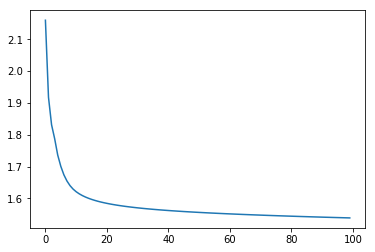

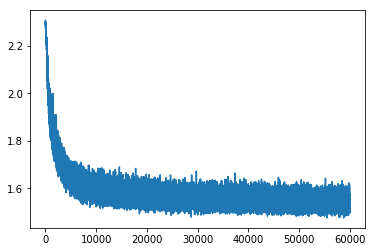

array([[ 964,    0,   11,    1,    1,    9,   13,    3,    4,   11],
       [   0, 1110,    1,    0,    1,    3,    3,    8,    4,    5],
       [   2,    3,  939,   20,    3,    2,    6,   24,    4,    2],
       [   1,    5,   10,  933,    0,   32,    2,    6,   18,   11],
       [   0,    1,   14,    1,  930,   10,    6,   10,   10,   28],
       [   2,    2,    1,   20,    0,  781,   13,    0,   14,   12],
       [   8,    4,   13,    2,   12,   15,  911,    0,   11,    0],
       [   2,    2,   14,   10,    2,    6,    1,  951,   10,   13],
       [   1,    8,   25,   14,    4,   27,    3,    3,  898,   12],
       [   0,    0,    4,    9,   29,    7,    0,   23,    1,  915]])

In [25]:
# plot losses
plt.figure()
plt.plot(losses)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_losses)
plt.show()

# print confusion matrix
confusion_matrix(np.argmax(y_test_pred, 1), y_test)